In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

In [2]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

___
#### 1) Calibration

In [3]:
I_cal, B_cal = np.loadtxt('data/M11/calibration_2.txt').T
B_cal = B_cal * 1e2 * 1e-3 #T

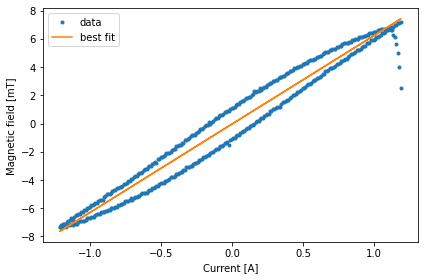

In [4]:
fig, ax = plt.subplots()

ax.plot(I_cal, B_cal*1e3, ls='', marker='.', label='data')
pop, pcov = curve_fit(linear, I_cal, B_cal)
ax.plot(I_cal, np.polyval(pop, I_cal)*1e3, label='best fit')

ax.set(xlabel='Current [A]', ylabel='Magnetic field [mT]')
ax.legend();

plt.tight_layout()
fig.savefig('figures/calibration.png', dpi=100)

In [5]:
pop, np.sqrt(np.diag(pcov))

(array([ 6.26008625e-03, -2.43919675e-05]),
 array([5.63210265e-05, 3.91905204e-05]))

In [8]:
print(f'{pop[1] :.5f}')

-0.00002


In [76]:
print(f'{np.sqrt(np.diag(pcov))[1] :.5f}')

0.00004


___
### 2) Hysteresis

In [177]:
ω = np.arange(300, 375, 5)

data = np.array([np.loadtxt('data/M11/hysteresis/'+str(ω_)) for ω_ in ω])

for i in range(len(ω)):
    X = data[i][:,1]
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (1 + 1) - 1
    data[i][:,1] = np.copy(X_scaled)
    
I = data[0,:,0]
B = np.polyval(p, I)
hys = data[:,:,1]

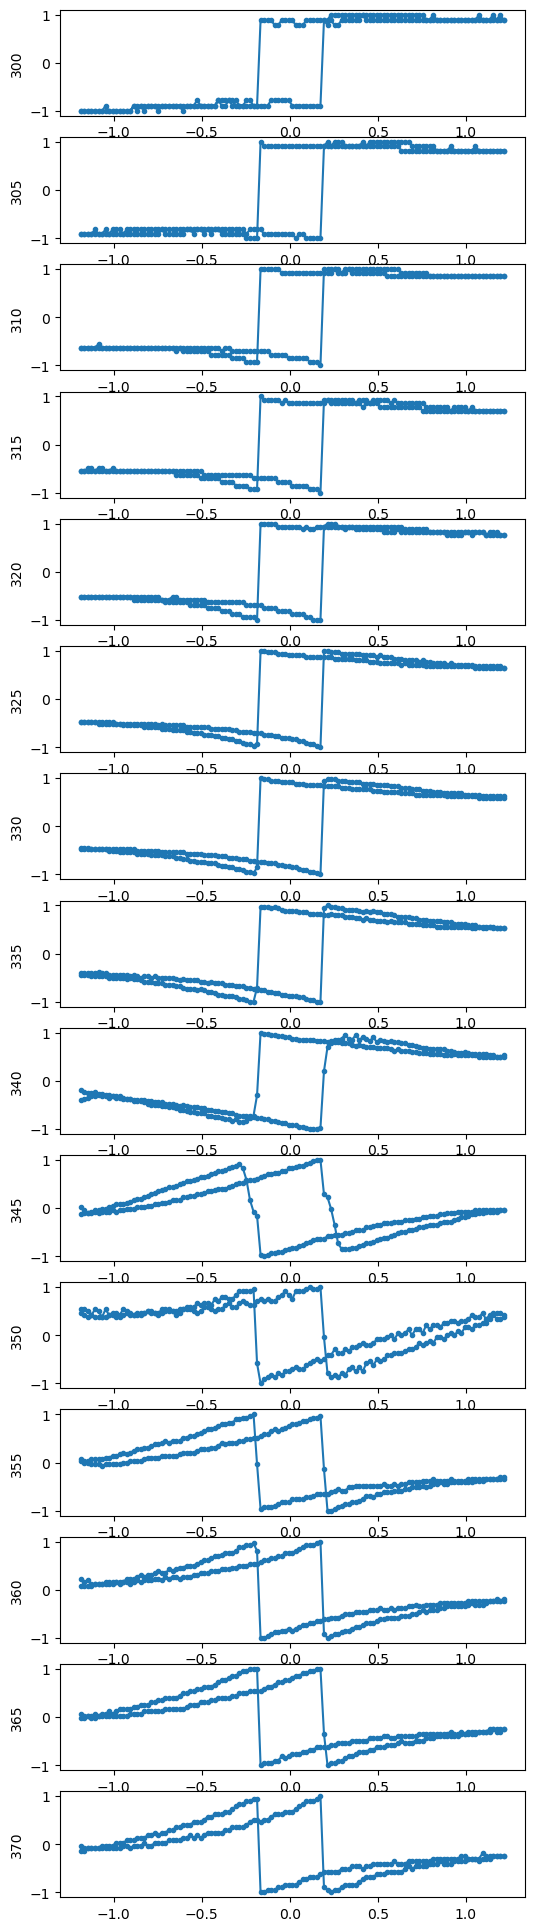

In [178]:
fig, ax = plt.subplots(15, figsize=(6,25), dpi=100)

for i in range(len(ω)):
    ax[i].plot(-I, -hys[i], marker='.', ls='-')
    ax[i].set(ylabel=ω[i])

In [179]:
def R(θ):
    return np.array([[np.cos(θ), -np.sin(θ)],[np.sin(θ), np.cos(θ)]])

In [180]:
ω_easy = 300
ω_hard = 345
M_easy = hys[ω == ω_easy][0]
M_hard = hys[ω == ω_hard][0]

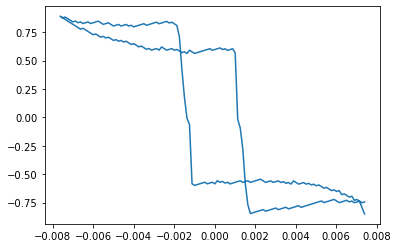

In [181]:
hard_rotated = np.array([R(-np.pi/4) @ point for point in data[ω == ω_hard][0]])
plt.plot(B, hard_rotated[:,1])

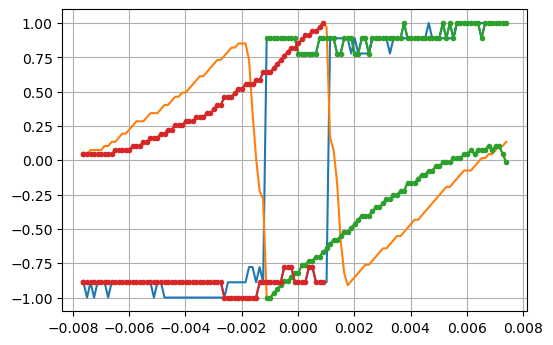

In [182]:
fig, ax = plt.subplots(dpi=100)

i1i, i1f = 0, 69
i2i, i2f = 120, 190
ax.plot(B, M_easy)
ax.plot(B, M_hard)
ax.plot(B[i1i:i1f], M_easy[i1i:i1f], marker='.', c='C2')
ax.plot(B[i1i:i1f], M_hard[i1i:i1f], marker='.', c='C2')
ax.plot(B[i2i:i2f], M_easy[i2i:i2f], marker='.', c='C3')
ax.plot(B[i2i:i2f], M_hard[i2i:i2f], marker='.', c='C3')
ax.grid()

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(1e3*B, M_easy, label='easy axis [100]')
ax.plot(1e3*B, M_hard, label='hard axis [110]')
ax.legend()
ax.set(xlabel='B [mT]', ylabel='Magnetization [a.u.]')
plt.tight_layout()
fig.savefig('figures/hysteresis.png', dpi=100)

In [184]:
abs(np.diff([B[i1i:i1f].min(), B[i1i:i1f].max()]))

array([0.00851372])

In [185]:
np.abs(np.diff((M_hard[i2i:i2f][0], M_easy[i2i:i2f][0])))

array([0.93366501])

___
## Contrast and Kerr rotation

In [173]:
α = np.array([-3, -1.5, 1.5, 3, 5])
data = np.array([np.loadtxt('data/M11/taks3/s polarized/305_%1.1f'%α_) for α_ in α])

In [174]:
c = (data[:,:,1].max(axis=(1)) - data[:,:,1].min(axis=(1))) / data[:,:,1].mean(axis=(1))

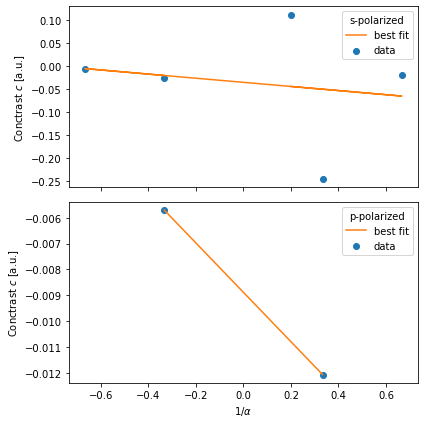

In [171]:
fig, ax = plt.subplots(2,1,figsize=(6,6), sharex=True)

ax[0].scatter(1/α, c, label='data')
ax[0].plot(1/α, np.polyval(np.polyfit(1/α, c, 1), 1/α), c='C1', label='best fit')

ax[0].set(ylabel='Conctrast $c$ [a.u.]')
ax[0].legend(title='s-polarized');

α = np.array([-3, 3])
data = np.array([np.loadtxt('data/M11/taks3/p polarized/305_%d'%α_) for α_ in α])
c = (data[:,:,1].max(axis=(1)) - data[:,:,1].min(axis=(1))) / data[:,:,1].mean(axis=(1))

ax[1].scatter(1/α, c, label='data')
ax[1].plot(1/α, np.polyval(np.polyfit(1/α, c, 1), 1/α), c='C1', label='best fit')

ax[1].set(xlabel=r'$1/\alpha$', ylabel='Conctrast $c$ [a.u.]')
ax[1].legend(title='p-polarized');

plt.tight_layout()

plt.tight_layout()
fig.savefig('figures/kerr_rotation.png', dpi=100)

In [175]:
popt, pcov = curve_fit(linear, 1/α, c)
popt, np.sqrt(np.diag(pcov)), popt[0] / 4

(array([-0.04483856, -0.03520752]),
 array([0.13775348, 0.06609616]),
 -0.011209640608569826)

___

In [43]:
α = np.array([-3, 3])
data = np.array([np.loadtxt('data/M11/taks3/p polarized/305_%d'%α_) for α_ in α])

In [44]:
c = (data[:,:,1].max(axis=(1)) - data[:,:,1].min(axis=(1))) / data[:,:,1].mean(axis=(1))

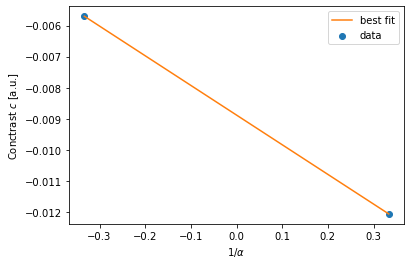

In [45]:
fig, ax = plt.subplots()

ax.scatter(1/α, c, label='data')
ax.plot(1/α, np.polyval(np.polyfit(1/α, c, 1), 1/α), c='C1', label='best fit')

ax.set(xlabel=r'$1/\alpha$', ylabel='Conctrast $c$ [a.u.]')
ax.legend();

In [46]:
popt, pcov = curve_fit(linear, 1/α, c)
popt, np.sqrt(np.diag(pcov)), popt[0] / 4

/home/umurcankaya/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([-0.00954016, -0.00888103]), array([inf, inf]), -0.002385039030701572)

___
### Incidence angle

In [47]:
γ = np.array([30, 35, 40, 45])
data = np.array([np.loadtxt('data/M11/taks3/angle of incidence/305_+1.5_%d'%γ_) for γ_ in γ])

In [48]:
c = (data[:,:,1].max(axis=(1)) - data[:,:,1].min(axis=(1))) / data[:,:,1].mean(axis=(1))

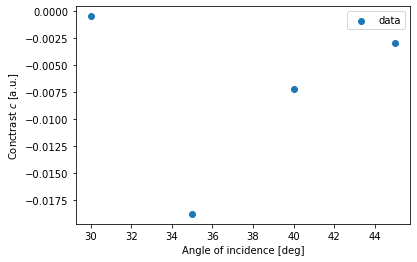

In [50]:
fig, ax = plt.subplots()

ax.scatter(γ, c, label='data')
ax.set(xlabel=r'Angle of incidence [deg]', ylabel='Conctrast $c$ [a.u.]')
ax.legend();

___
### Kerr microscope

In [150]:
idx = np.arange(-15,16)
idx = idx[idx!=0]

im = [np.array(Image.open('data/G2 2020-21/%d.tiff'%i)) for i in idx]
im_array = np.array(im)[:,150:,:500]

M = im_array.sum(axis=(1,2))
X = M
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (1 + 1) - 1
M = np.copy(X_scaled)

In [151]:
X = im_array
X_std = (X - X.min(axis=(1,2), keepdims=True)) / (X.max(axis=(1,2), keepdims=True) - X.min(axis=(1,2), keepdims=True))
X_scaled = X_std * (1 + 1) - 1
im_array = np.copy(X_scaled)

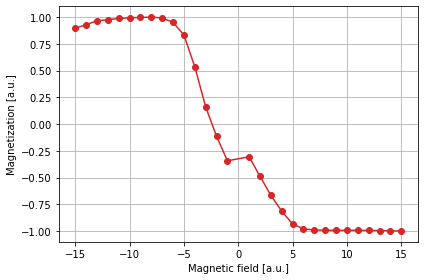

In [153]:
fig, ax = plt.subplots()

ax.plot(idx, M, marker='o', c='C3')

ax.grid()
ax.set(xlabel='Magnetic field [a.u.]', ylabel='Magnetization [a.u.]')

plt.tight_layout()
fig.savefig('figures/kerr_mic_loop.png', dpi=100)

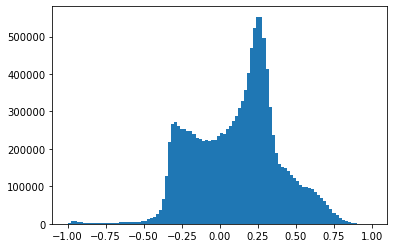

In [131]:
plt.hist(im_array.flatten(), bins=100);

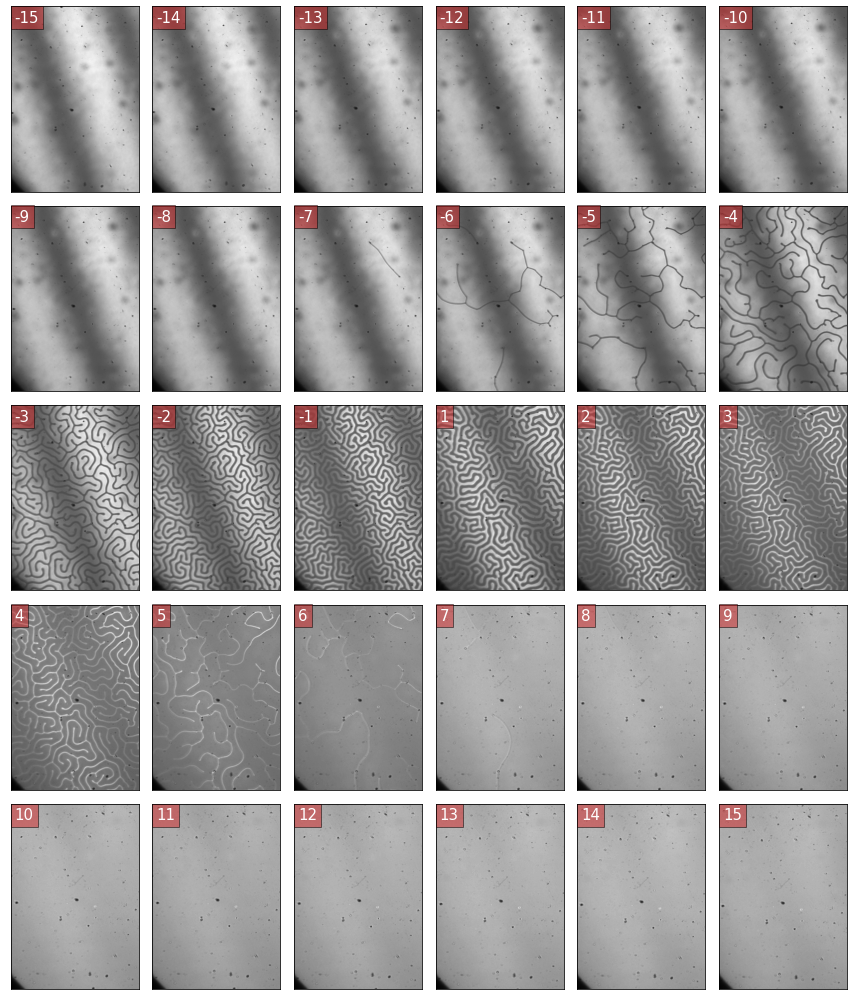

In [142]:
fig, ax = plt.subplots(5,6, figsize=(12, 14))
plt.subplots_adjust(hspace=0, wspace=0)

for axis in ax.flatten():
    axis.set(xticks=(), yticks=())

c = 0
for i in range(5):
    for j in range(6):
        ax[i,j].imshow(im_array[c][150:,:500], cmap='binary_r')
        ax[i,j].text(15, 60, idx[c], c='w', fontsize=15, bbox=dict(facecolor='C3', alpha=0.5))
        c += 1
        
plt.tight_layout()
fig.savefig('figures/domains.png', dpi=100)

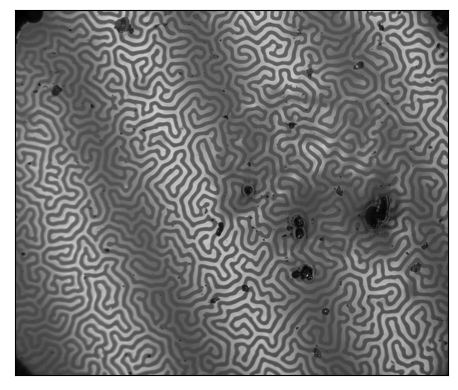

In [148]:
im = [np.array(Image.open('data/G2 2020-21/%d.tiff'%i)) for i in idx]
im_array = np.array(im)

fig, ax = plt.subplots(dpi=100)
ax.imshow(im_array[idx==1][0], cmap='binary_r')
ax.set(xticks=(), yticks=())

plt.tight_layout()
fig.savefig('figures/kerr_mic.png', dpi=100)